# Vocab Analysis
## Section 3: Analyze the Data

### 1. Import necessary libraries

In [1]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# show all columns
pd.options.display.max_columns = None

### 2. Import necessary datasets

In [4]:
# https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas?noredirect=1&lq=1
# import notes
notes_location = "datasets/df_notes_017_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_011_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

# todo: import revlog

In [5]:
df_notes.head()

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
0,1331799797112,commonword kanji n2 noun,隙間,すきま,2012-03-15 08:23:17.112,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,3,[2],[3:4],2.0,kanji,76.5,2245.0,4.5,0.5,9,1,0,0,1,1,0.111111,17.000000,0,2,0,2
2,1331799797114,commonword noun fromdict suruverb kanji,移籍,いせき,2012-03-15 08:23:17.114,2019-05-18 12:54:16.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,[2],[3:4],NaN,kanji,99.0,1980.0,7.0,0.0,7,0,0,0,1,0,0.000000,14.142857,0,1,0,1
3,1331799797117,commonword transitive verb fromdict kanji n2,吊るす,つるす,2012-03-15 08:23:17.117,2019-05-18 14:33:12.000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,3,[3:4],[3:4],2.0,kanji,73.5,2270.0,5.0,0.5,10,1,0,0,1,1,0.100000,14.700000,0,2,0,1
8,1331799797122,hassame kanji fromdict,在庫,ざいこ,2012-03-15 08:23:17.122,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,[2],[3:4],NaN,kanji,224.0,2130.0,5.0,0.0,5,0,0,0,1,0,0.000000,44.800000,2,2,0,3
9,1331799797126,kanji fromdict,有能,ゆうのう,2012-03-15 08:23:17.126,2019-05-18 14:33:12.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,4,[2],[3:4],NaN,kanji,248.0,2130.0,9.0,0.0,9,0,0,0,1,0,0.000000,27.555556,2,2,0,2


In [6]:
print(df_notes.TermLenGroup.unique())
print(df_notes.SyllablesGroup.unique())
print(df_notes.script.unique())

['[2]' '[3:4]' '[5:8]' '[1]' '[9: ]']
['[3:4]' '[5:8]' '[9: ]' '[2]' '[1]']
['kanji' 'katakana' 'hiragana' nan]


In [7]:
df_cards.head()

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi
3,1331799797114,1331799797114,99,1980,7,0,2012-03-15 08:23:17.114,2015-02-04 09:00:00.000,0,1,0,0,1,0,read,0.142857,14.142857
8,1331799797122,1331799797122,224,2130,5,0,2012-03-15 08:23:17.122,2015-07-04 09:00:00.000,2,2,0,0,1,0,read,0.200000,44.800000
9,1331799797125,1331799797125,291,1930,18,1,2012-03-15 08:23:17.125,2016-01-30 09:00:00.000,2,1,0,0,1,0,read,0.111111,16.166667
10,1331799797126,1331799797126,248,2130,9,0,2012-03-15 08:23:17.126,2015-09-04 09:00:00.000,2,2,0,0,1,0,read,0.111111,27.555556
11,1331799797127,1331799797127,229,2270,9,0,2012-03-15 08:23:17.127,2015-06-11 09:00:00.000,2,2,0,0,1,0,read,0.111111,25.444444


### 3. Observe Metadata (tag) Frequency:

In [8]:
tag_freq = pd.Series(' '.join(df_notes.tags).split()).value_counts()

In [9]:
tag_freq.head(20)

kanji                   4057
textbook                1743
metalite                1256
fromdict                1248
verb                     864
fromtest                 836
hasrobo                  482
commonword               355
fromexam                 354
hiragana                 313
katakana                 249
noun                     238
college                  224
addsimilar               223
numeric                  212
checked                  201
usuallywritteninkana     189
n3                       184
media                    178
convo                    175
dtype: int64

In [10]:
tag_freq.head(60)[20:]

semester1       139
transitive      135
lyrics          126
adj             113
iadj            113
counter         105
intransitive    102
technical        97
n4               92
place            91
multimeaning     86
n5               81
n2               74
hassame          74
multireading     62
gairaigo         60
n1               57
body             53
adv              50
haskanji         49
type5r           48
name             46
onomatopoeic     42
animal           42
noadjective      39
culture          37
people           36
geography        36
multiterm        36
food             35
magazine         34
ghibli           34
suruverb         33
multiwriting     33
math             32
abbr             31
suffix           30
mergeterms       30
inspect          29
hassimilar       28
dtype: int64

# Initial Observations

Looks like our data is ready for some proper inspection! What are some questions that we might ask of this dataset? We could start with some simple/basic broad/overview observations about the (condensed) dataset such as:
- How many terms (unique notes) exist?
- How many study vectors (unique card types) exist (were utilized by student A)?
- When did student A first start studying?
- What is the data distribution for reps count? For laspes count?
- Of the terms that exist, how many had audio data?
- Of the terms that exist, how many had image data?

In [11]:
# unique terms in the condensed dataset
len(df_notes['Term'].unique())

5941

In [12]:
# confirm what card types exist
df_cards['cardtype'].value_counts()

read      6221
look       711
listen       8
recall       3
Name: cardtype, dtype: int64

In [13]:
#pd_crt # datetime of collection creation (studying commenced from this date)

In [14]:
print(df_cards.shape)

(6943, 17)


In [15]:
print(df_notes.shape)

(5941, 62)


# Define features

In [16]:
#components of binary list (cards)
type_list = ['CardType_listen','CardType_look','CardType_read','CardType_recall']

In [17]:
#components of binary list (notes, combo)
genre_list = ['clothing','animal','body','food','place']

source_list = ['fromdict','fromexam','textbook','college']

convo_list = ['convo','nonconvo']

jlpt_list = ['n1','n2','n3','n4','n5']

pos_list = ['noun','verb','adj','adv']

char_list = ['katakana','hiragana','kanji']

has_list = ['hasVisual','hasAudio','hasMultiMeaning','hasMultiReading','hasSimilarSound','hasSameSound',
    'hasSimilarMeaning','hasAltForm','hasRichExamples']

card_list = ['hasListenCard','hasPictureCard','hasReadCard','hasTranslateCard']

other_list = ['commonword','metalite']

In [18]:
#components of continuous list
len_list = ['TermLen','Syllables']

study_data_list = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                   'total_reps','total_lapses']

In [19]:
binary_list = list(genre_list + source_list + jlpt_list +
    pos_list + char_list + has_list + other_list + convo_list) #card_list

continuous_list = list(len_list + study_data_list)

discrete_non_binary_list = ['NoteCreated','LastModified','TermLenGroup','SyllablesGroup','jlpt_lvl_d']

In [20]:
numeric_note_fields = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                       'total_reps','total_lapses']

mean_card_fields = ['mean_card_waste','mean_card_roi']

In [21]:
note_quintiles = ['n_ivl_q','n_factor_q','n_waste_q','n_roi_q']

In [22]:
#show correlation of stats via heatmap
df_cards_001_corr = df_cards.copy()
df_cards_001_corr = df_cards_001_corr.drop(["cid","nid",'c_ivl_q','c_factor_q','ivl','factor','reps','lapses'], axis=1)

# Inspect card correlations visually

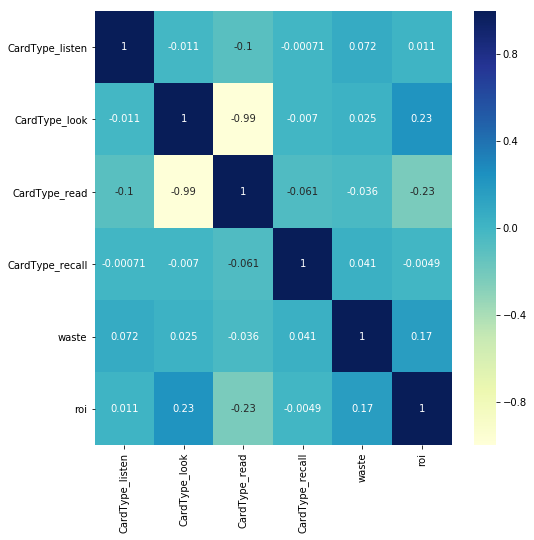

In [23]:
corr_card = df_cards_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax_card = sns.heatmap(corr_card, vmin=-1, cmap="YlGnBu", annot=True)

# Inspect note correlations visually

In [24]:
#show correlation of stats via heatmap
df_notes_001_corr = df_notes.copy()
df_notes_001_corr = df_notes_001_corr.drop(list(
    ["nid",'jlpt_lvl_d'] +
    card_list + convo_list + numeric_note_fields + genre_list + 
    source_list + jlpt_list + char_list + has_list + 
    other_list + len_list + note_quintiles), axis=1)

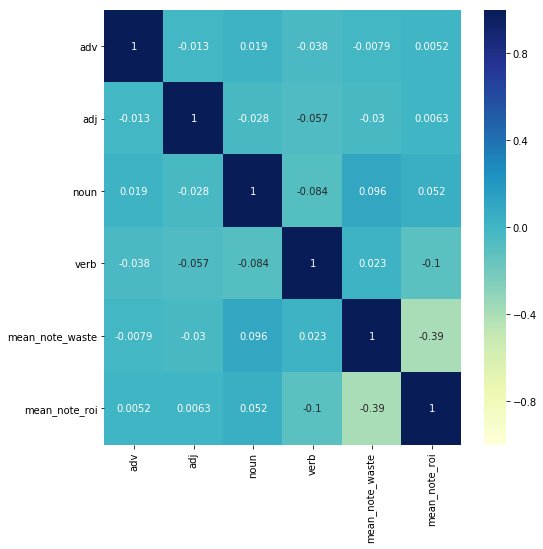

In [25]:
# Inspect the correlation between word type & mean note ROI & mean note waste
corr = df_notes_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin=-1, cmap="YlGnBu", annot=True)

In [26]:
df_notes_002_corr = df_notes.copy()
df_notes_002_corr = df_notes_002_corr.drop(list(
    ["nid","total_reps","total_lapses"] + 
    numeric_note_fields + source_list + convo_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles + ['jlpt_lvl_d','mean_factor']), axis=1)

# Inspect correlations by script

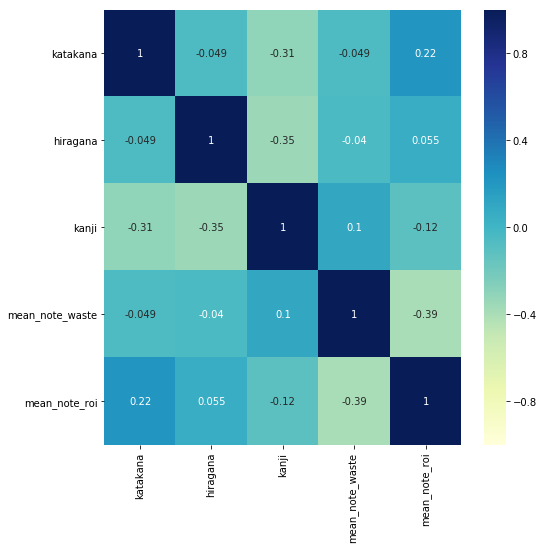

In [27]:
#show correlation of stats via heatmap
corr2 = df_notes_002_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax2 = sns.heatmap(corr2, vmin=-1, cmap="YlGnBu", annot=True)

In [28]:
df_notes_003_corr = df_notes.copy()
df_notes_003_corr = df_notes_003_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor'] + 
    numeric_note_fields + convo_list + char_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlations by word first encounter

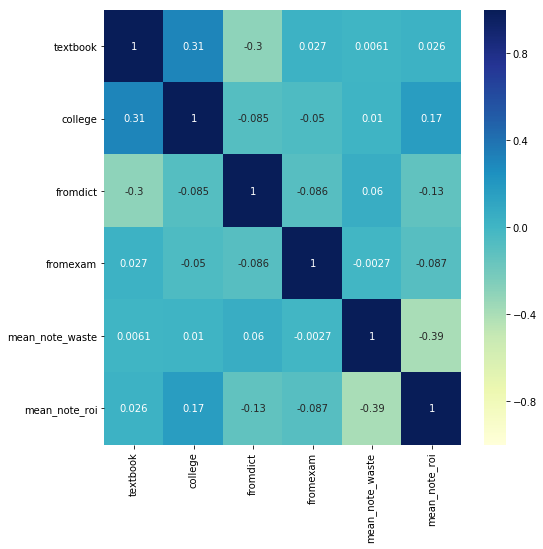

In [29]:
#show correlation of stats via heatmap
corr3 = df_notes_003_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax3 = sns.heatmap(corr3, vmin=-1, cmap="YlGnBu", annot=True)

In [30]:
df_notes_004_corr = df_notes.copy()
df_notes_004_corr = df_notes_004_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'commonword'] + numeric_note_fields + char_list + source_list + 
    pos_list + len_list + has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlation of convo ok'd vs not, & metadata poorness

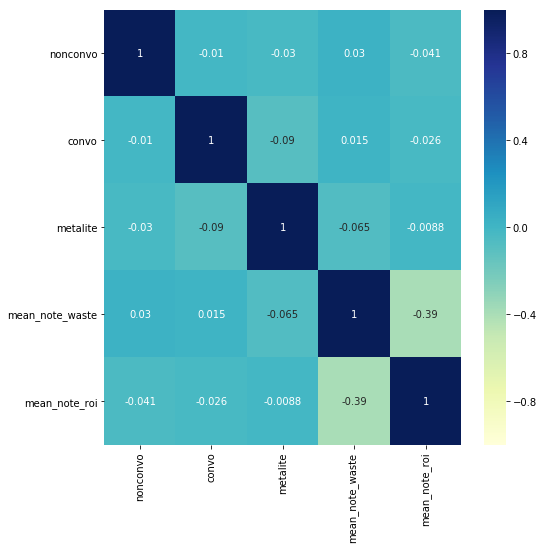

In [31]:
#show correlation of stats via heatmap
corr4 = df_notes_004_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax4 = sns.heatmap(corr4, vmin=-1, cmap="YlGnBu", annot=True)

# Inspect field data correlations

In [32]:
df_notes_005_corr = df_notes.copy()
df_notes_005_corr = df_notes_005_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'metalite']+other_list+convo_list+char_list+numeric_note_fields+
    source_list+pos_list+len_list+genre_list+jlpt_list+card_list + note_quintiles), axis=1)

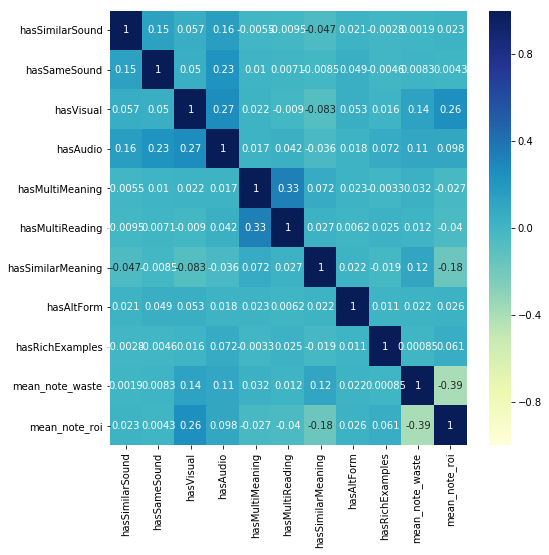

In [33]:
#show correlation of stats via heatmap
corr5 = df_notes_005_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax5 = sns.heatmap(corr5, vmin=-1, cmap="YlGnBu", annot=True)

In [34]:
df_cards_002_describe = df_cards.copy()
df_cards_002_describe = df_cards_002_describe.drop(list(["cid","nid",'c_ivl_q','c_factor_q']+type_list), axis=1)

df_cards_002_describe.describe()

,ivl,factor,reps,lapses,waste,roi
count,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000
mean,313.901628,1720.894714,15.711364,0.605934,0.105220,27.120429
std,240.017395,386.690762,9.093734,1.176197,0.035025,23.644381
min,1.000000,1300.000000,5.000000,0.000000,0.033333,0.008850
25%,165.000000,1300.000000,10.000000,0.000000,0.076923,9.850000
50%,237.000000,1680.000000,13.000000,0.000000,0.100000,19.416667
75%,400.000000,2050.000000,19.000000,1.000000,0.125000,38.207143
max,1732.000000,2710.000000,113.000000,16.000000,0.204545,107.230769


In [35]:
df_cards_002_describe.corr()

,ivl,factor,reps,lapses,waste,roi
ivl,1.000000,0.310010,-0.247902,-0.273238,-0.117293,0.834802
factor,0.310010,1.000000,-0.651822,-0.399983,0.485766,0.632579
reps,-0.247902,-0.651822,1.000000,0.864010,-0.148274,-0.521885
lapses,-0.273238,-0.399983,0.864010,1.000000,0.305834,-0.413958
waste,-0.117293,0.485766,-0.148274,0.305834,1.000000,0.167023
roi,0.834802,0.632579,-0.521885,-0.413958,0.167023,1.000000


# Plot ROI trends for cards using linear regression

In [36]:
import numpy as np
import statsmodels.formula.api as smf

In [37]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('roi ~ ivl + factor - 1', data=df_cards).fit()

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.584e+04
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        12:38:23   Log-Likelihood:                -27322.
No. Observations:                6943   AIC:                         5.465e+04
Df Residuals:                    6941   BIC:                         5.466e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ivl            0.0702      0.001    107.824      0.000       0.069       0.071
factor         0.0040      0.000     27.550      0.000       0.004       0.004
==============================================================================
Omnibus:                     1743.482   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5786.834
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         7.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression (using everything)

In [39]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_ivl + mean_factor + mean_reps + mean_lapses + total_reps + total_lapses - 1', data=df_notes).fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        12:38:23   Log-Likelihood:                -20783.
No. Observations:                5941   AIC:                         4.158e+04
Df Residuals:                    5933   BIC:                         4.164e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Syllables       -0.5369      0.084     -6.380      0.000      -0.702      -0.372
TermLen          0.8065      0.119      6.789      0.000       0.574       1.039
mean_ivl         0.0756      0.001    134.735      0.000       0.074       0.077
mean_factor      0.0099      0.000     56.730      0.000       0.010       0.010
mean_reps       -0.9385      0.040    -23.604      0.000      -1.016      -0.861
mean_lapses      8.6820      0.595     14.596      0.000       7.516       9.848
total_reps      -0.0812      0.033     -2.473      0.013      -0.146      -0.017
total_lapses    -4.1467      0.517     -8.020      0.000      -5.160      -3.133
==============================================================================
Omnibus:                     1246.639   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6070.944
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       7.590   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot ROI trends for notes using linear regression

In [41]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_ivl + mean_factor + mean_lapses - 1', data=df_notes).fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.307e+04
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        12:38:24   Log-Likelihood:                -22057.
No. Observations:                5941   AIC:                         4.412e+04
Df Residuals:                    5936   BIC:                         4.416e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Syllables      -1.6587      0.101    -16.413      0.000      -1.857      -1.461
TermLen         0.7822      0.147      5.327      0.000       0.494       1.070
mean_ivl        0.0674      0.001    108.720      0.000       0.066       0.069
mean_factor     0.0082      0.000     39.121      0.000       0.008       0.009
mean_lapses    -4.9617      0.132    -37.535      0.000      -5.221      -4.703
==============================================================================
Omnibus:                     1682.487   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5602.827
Skew:                           1.420   Prob(JB):                         0.00
Kurtosis:                       6.817   Cond. No.                     2.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot waste trends for notes using linear regression

In [43]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_waste ~ mean_ivl + mean_factor - 1', data=df_notes).fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_note_waste   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     894.3
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        12:38:24   Log-Likelihood:                 11343.
No. Observations:                5941   AIC:                        -2.268e+04
Df Residuals:                    5939   BIC:                        -2.267e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mean_ivl    -1.655e-05   2.23e-06     -7.436      0.000   -2.09e-05   -1.22e-05
mean_factor  1.373e-05   4.67e-07     29.389      0.000    1.28e-05    1.46e-05
==============================================================================
Omnibus:                      799.521   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1171.031
Skew:                           1.086   Prob(JB):                    5.17e-255
Kurtosis:                       2.905   Cond. No.                         8.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (waste ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (ROI ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

In [45]:
df_notes_006_corr = df_notes.copy()
df_notes_006_corr = df_notes_006_corr.drop(list(binary_list + card_list + ['nid','jlpt_lvl_d']), axis=1)

In [46]:
df_notes_006_corr.describe()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
count,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.0,5941.000000
mean,2.667396,4.212086,305.481793,1744.223896,15.000505,0.522162,17.426359,0.625484,0.022460,26.557640,1.825450,0.884026,0.0,1.830500
std,1.216661,1.695348,217.285637,383.917920,8.306027,0.948848,11.332732,1.132301,0.034187,21.781337,1.326497,0.773193,0.0,1.320157
min,1.000000,1.000000,1.000000,1300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.0,0.000000
25%,2.000000,3.000000,163.000000,1300.000000,10.000000,0.000000,10.000000,0.000000,0.000000,10.333333,1.000000,0.000000,0.0,1.000000
50%,2.000000,4.000000,240.000000,1725.000000,13.000000,0.000000,14.000000,0.000000,0.000000,19.500000,2.000000,1.000000,0.0,2.000000
75%,3.000000,5.000000,402.000000,2050.000000,18.000000,1.000000,22.000000,1.000000,0.047619,37.416667,3.000000,1.000000,0.0,3.000000
max,15.000000,30.000000,1623.500000,2710.000000,81.000000,8.000000,101.000000,11.000000,0.128205,98.714286,4.000000,2.000000,0.0,4.000000


In [47]:
df_notes_006_corr.corr()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q
TermLen,1.000000,0.688779,0.015773,0.089760,-0.134900,-0.117982,-0.148820,-0.126119,-0.115047,0.094174,0.050705,0.082650,NaN,0.104192
Syllables,0.688779,1.000000,-0.054069,0.019480,-0.062817,-0.065349,-0.082342,-0.073150,-0.063693,-0.016118,-0.026655,0.010933,NaN,-0.001838
mean_ivl,0.015773,-0.054069,1.000000,0.274568,-0.209269,-0.245172,0.013021,-0.168242,-0.209609,0.830999,0.878497,0.290351,NaN,0.774485
mean_factor,0.089760,0.019480,0.274568,1.000000,-0.685686,-0.408947,-0.544661,-0.374352,-0.348930,0.606557,0.338869,0.944048,NaN,0.631699
mean_reps,-0.134900,-0.062817,-0.209269,-0.685686,1.000000,0.848140,0.832349,0.794704,0.652525,-0.513562,-0.299560,-0.655366,NaN,-0.600266
mean_lapses,-0.117982,-0.065349,-0.245172,-0.408947,0.848140,1.000000,0.721410,0.942438,0.877487,-0.414405,-0.336820,-0.388357,NaN,-0.517074
total_reps,-0.148820,-0.082342,0.013021,-0.544661,0.832349,0.721410,1.000000,0.831627,0.604329,-0.325802,-0.074997,-0.501459,NaN,-0.395109
total_lapses,-0.126119,-0.073150,-0.168242,-0.374352,0.794704,0.942438,0.831627,1.000000,0.854990,-0.370121,-0.253465,-0.348059,NaN,-0.458052
mean_note_waste,-0.115047,-0.063693,-0.209609,-0.348930,0.652525,0.877487,0.604329,0.854990,1.000000,-0.392594,-0.303566,-0.322716,NaN,-0.488284
mean_note_roi,0.094174,-0.016118,0.830999,0.606557,-0.513562,-0.414405,-0.325802,-0.370121,-0.392594,1.000000,0.799916,0.589098,NaN,0.914382


In [48]:
get_rows_by_value_in_col(df_notes, 1523892839900, 'nid')

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q


In [49]:
get_rows_by_value_in_col(df_cards, 1523892839900, 'nid')

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi


In [50]:
df_notes_n_corr = df_notes.copy()
df_notes_n_corr = df_notes_n_corr.drop(list(binary_list + card_list + 
    ['nid','tags','Term','Yomi1','jlpt_lvl_d','total_reps','total_lapses',
     'mean_note_waste']), axis=1)

In [51]:
df_notes_n_corr.columns.values

array(['NoteCreated', 'LastModified', 'TermLen', 'Syllables',
       'TermLenGroup', 'SyllablesGroup', 'script', 'mean_ivl',
       'mean_factor', 'mean_reps', 'mean_lapses', 'mean_note_roi',
       'n_ivl_q', 'n_factor_q', 'n_waste_q', 'n_roi_q'], dtype=object)

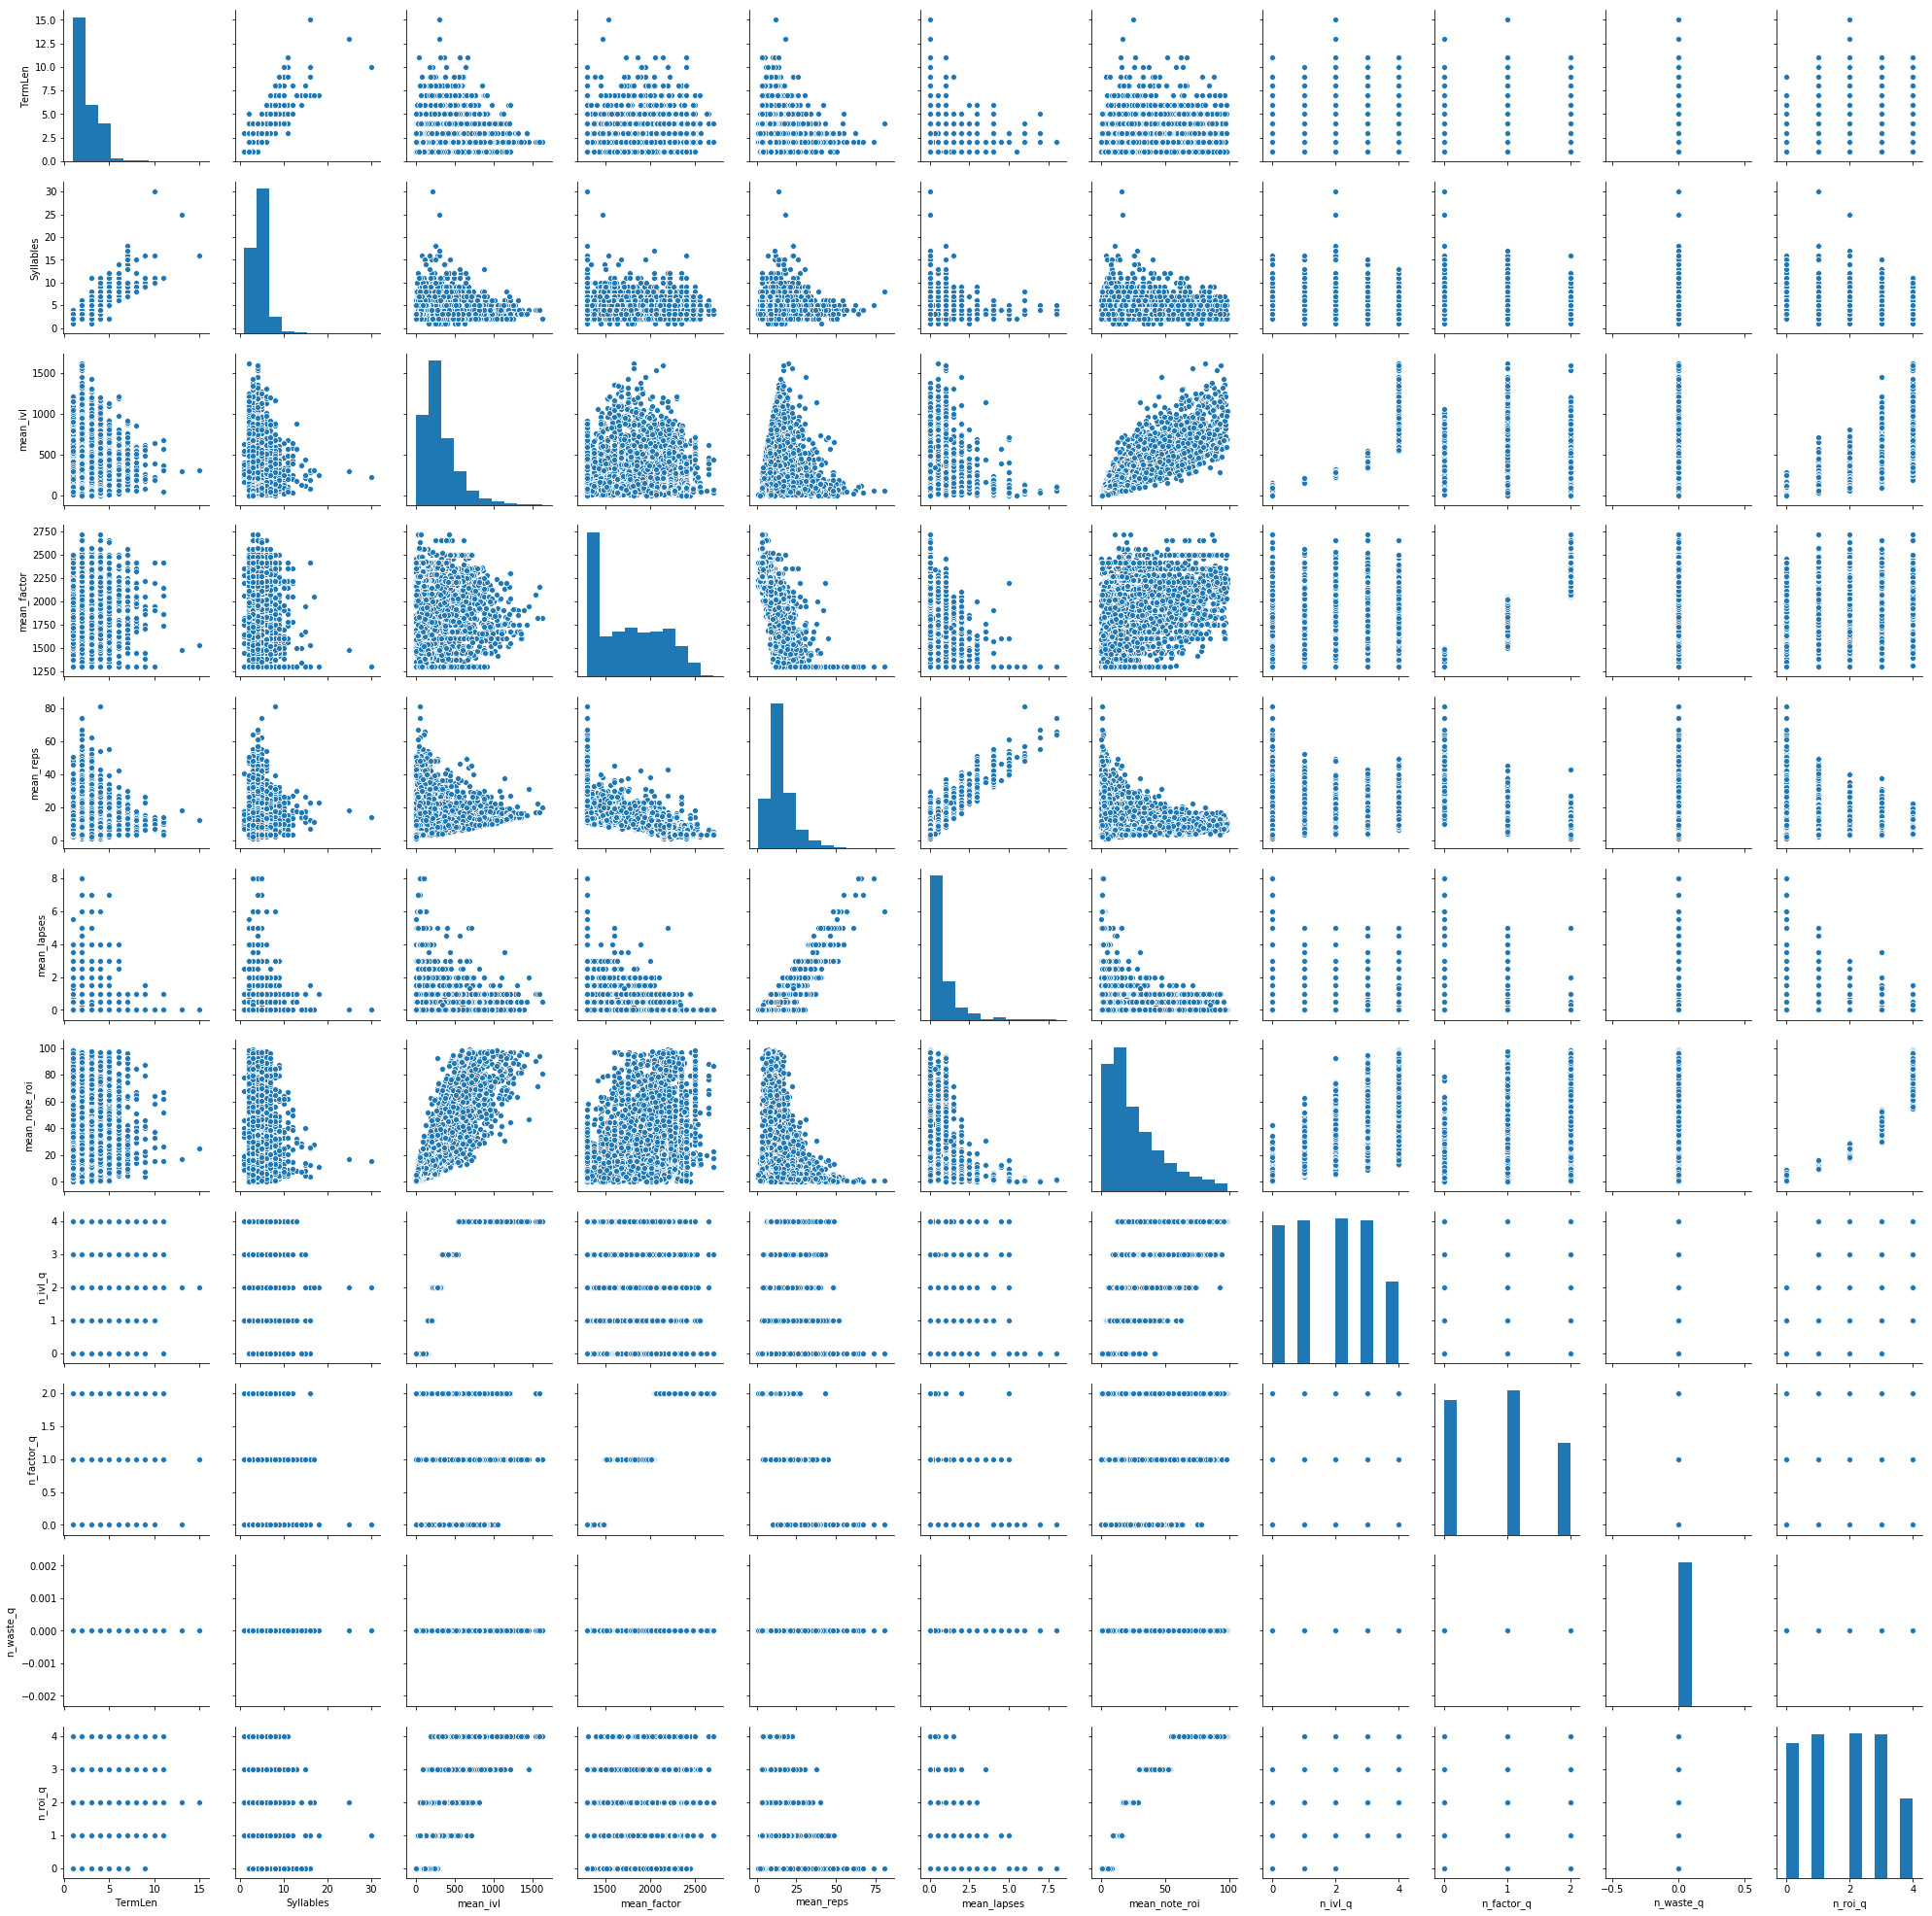

In [52]:
# Basic correlogram
sns.pairplot(df_notes_n_corr)
plt.show()

# Intitial Analysis

There appears to be a linear relationship between lapses & reps. It appears that lapses incur a cost of increasing reps. However, this info isn't directly actionable - one cannot simply just 'not forget'. The primary focus is what can be done to minimize lapses while not sacrificing efficiency (long intervals for few reps, and lapses as close as possible to 0).

# Topical Analysis

After doing some basic assessments of the data, we can dig a bit deeper:
- Is there a correlation between words having multiple readings ("yomi") and their forget rate\*?
- Is there a correlation between words having same/similar sounding words and their forget rate\*?
- What might the effect of word length be on memorability? \*\*, \*\*\*

> \* Forget rate can be understand as a multitude of things, such as the ratio between lapses & reps, as well as the raw lapse count, the average interval, and other numbers/ratios to be determined. I will attempt to clarify this in the process.  
\*\* Memorability being loosely correlated with forget rate, where memorability could be understood as a word/term's intrinsic "stickiness" in the brain, as opposed to an individual or collective's capacity to keep words/terms in their head. Sources pending.  
\*\*\* A huge caveat here being that, this dataset has a sample size of 1 (for both student and language), so all observations, interpretations, and understandings must be taken with more than a few grains of salt (and tested further with larger sample sizes, of at least 200 students, and 5 or more languages).

# Further Analysis

For a deeper understanding of what it means to aquire new terminology, the researcher believes it best to conduct analysis on term acquisition by merging multiple vectors (individual cards) of a single term into single entries, where dummy values for each vector (such as review count, lapse count, etc.) are encoded per entry. This would enable inspection and correlation analysis of:
- total reviews per term
- average ratio of reviews per term per vector (look vs hear vs recall vs read)
- where lapses are most likely to occur (per word, per vector, etc.)
- how word length, presence of kanji, katakana, hirgana, or combination thereof, may affect the above counts & ratios

# Further Information

The Spaced Repetition Software (\"SRS\") used for the study of Japanese by student \"A\" is an open souce program called Anki. The algorithm used by it to \"graduate\" (also refered to as \"maturing\") study items (called cards) so that subsequent reviews/practices will be spaced into the future is referred to as SM-2. [Please click here for more information on the SM-2 algorithm used in Anki.]("https://apps.ankiweb.net/docs/manual.html#what-algorithm")